In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('/Users/suchirmvelpanur/Desktop/Projects/Miscellaneous Coursework/Used-Cars-Project-Using-Spark/cleaned_used_cars_dataset.csv')
df

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_60094/1263460411.py:10: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/suchirmvelpanur/Desktop/Projects/Miscellaneous Coursework/Used-Cars-Project-Using-Spark/cleaned_used_cars_dataset.csv')


,vin,body_type,daysonmarket,engine_type,exterior_color,fuel_type,horsepower,interior_color,make_name,maximum_seating,...,seller_rating,torque,transmission,wheel_system,year,combined_fuel_economy,legroom,major_options_count,dealer_region,size_of_vehicle
0,W1Y4EBHY8LT026515,Van,66,V6,Silver,Diesel,188.0,Black,Mercedes-Benz,3,...,4 stars,325.000000,A,4X2,2020,26.114818,76.866806,2.0,NaN,590.900003
1,5UXTY9C04M9D96295,SUV / Crossover,18,Gasoline engine,Black,Gasoline,170.0,Black,BMW,5,...,4 stars,264.289015,A,FWD,2021,26.114818,80.164010,9.0,NaN,457.278513
2,3VWD17AJ3FM302075,Sedan,12,I4,White,Gasoline,170.0,Black,Volkswagen,5,...,4 stars,184.000000,A,FWD,2015,31.000000,79.300000,6.0,NaN,429.400004
3,5FNYF8H5XLB016437,SUV / Crossover,20,V6,Blue,Gasoline,280.0,Black,Honda,5,...,3 stars,262.000000,A,AWD,2020,21.500000,80.500000,6.0,NaN,471.799997
4,19UUB2F64JA005573,Sedan,29,V6,White,Gasoline,290.0,Black,Other,5,...,4 stars,267.000000,A,FWD,2018,26.114818,77.100000,21.0,NaN,448.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128280,3VW6T7AUXLM007788,Hatchback,51,I4,Black,Gasoline,228.0,Mixed Colors,Volkswagen,5,...,4 stars,258.000000,Dual Clutch,FWD,2020,28.000000,76.800000,3.0,NaN,413.399999
128281,JTND4RBE1L3083231,Hatchback,276,I4,Other Color,Gasoline,168.0,Black,Toyota,5,...,5 stars,151.000000,A,FWD,2020,26.114818,71.900000,5.0,NaN,416.699998
128282,2GNAXKEVXK6143720,SUV / Crossover,16,I4,White,Gasoline,170.0,Gray,Chevrolet,5,...,5 stars,264.289015,A,FWD,2019,26.114818,80.800000,5.0,NaN,443.300007
128283,1GNERFKW0LJ225508,SUV / Crossover,171,V6,Black,Gasoline,310.0,Black,Chevrolet,8,...,4 stars,266.000000,A,FWD,2020,22.500000,79.400000,6.0,NaN,493.900000


In [167]:
# Calculate null counts for each column
null_counts = df.isnull().sum()

# Display null counts for each column
for col_name, null_count in null_counts.items():
    print(f"Column '{col_name}' has {null_count} null values.")

Column 'vin' has 0 null values.
Column 'body_type' has 0 null values.
Column 'daysonmarket' has 0 null values.
Column 'engine_type' has 0 null values.
Column 'exterior_color' has 0 null values.
Column 'fuel_type' has 0 null values.
Column 'horsepower' has 0 null values.
Column 'interior_color' has 0 null values.
Column 'make_name' has 0 null values.
Column 'maximum_seating' has 0 null values.
Column 'mileage' has 0 null values.
Column 'model_name' has 0 null values.
Column 'price' has 0 null values.
Column 'savings_amount' has 0 null values.
Column 'seller_rating' has 0 null values.
Column 'torque' has 0 null values.
Column 'transmission' has 0 null values.
Column 'wheel_system' has 0 null values.
Column 'year' has 0 null values.
Column 'combined_fuel_economy' has 0 null values.
Column 'legroom' has 0 null values.
Column 'major_options_count' has 0 null values.
Column 'dealer_region' has 112060 null values.
Column 'size_of_vehicle' has 0 null values.


In [168]:
'''=> except dealer region which acts as an ID, no other column has null values'''

'=> except dealer region which acts as an ID, no other column has null values'

In [169]:
# checking the shape of the dataset
shape = df.shape

print(f"The shape of the dataframe is {shape[0]} rows and {shape[1]} columns")

The shape of the dataframe is 128285 rows and 24 columns


In [170]:
# Selecting and printing the 'engine_type' column
df['engine_type']


0                      V6
1         Gasoline engine
2                      I4
3                      V6
4                      V6
               ...       
128280                 I4
128281                 I4
128282                 I4
128283                 V6
128284                 I4
Name: engine_type, Length: 128285, dtype: object

In [171]:
# Grouping by 'engine_type' and counting the occurrences of each value
engine_type_counts = df.groupby('engine_type').size().reset_index(name='count')

# Displaying the count of each value in the 'engine_type' column
print(engine_type_counts)

        engine_type  count
0     Diesel engine     40
1    Electric Motor    758
2   Gasoline engine   3430
3                H4   2915
4                H6    220
5                I2     43
6                I3   2404
7                I4  66758
8                I5    130
9                I6   2021
10               R2      1
11              V10     24
12              V12     57
13               V6  34215
14               V8  15244
15              W12     25


In [172]:
# Calculate mode
mode_engine_type = df['engine_type'].mode()[0]

print("Mode of engine_type:", mode_engine_type)

Mode of engine_type: I4


In [173]:
'''PLOTTING A BAR GRAPH FOR THE COLUMN 'engine_type'''

"PLOTTING A BAR GRAPH FOR THE COLUMN 'engine_type"

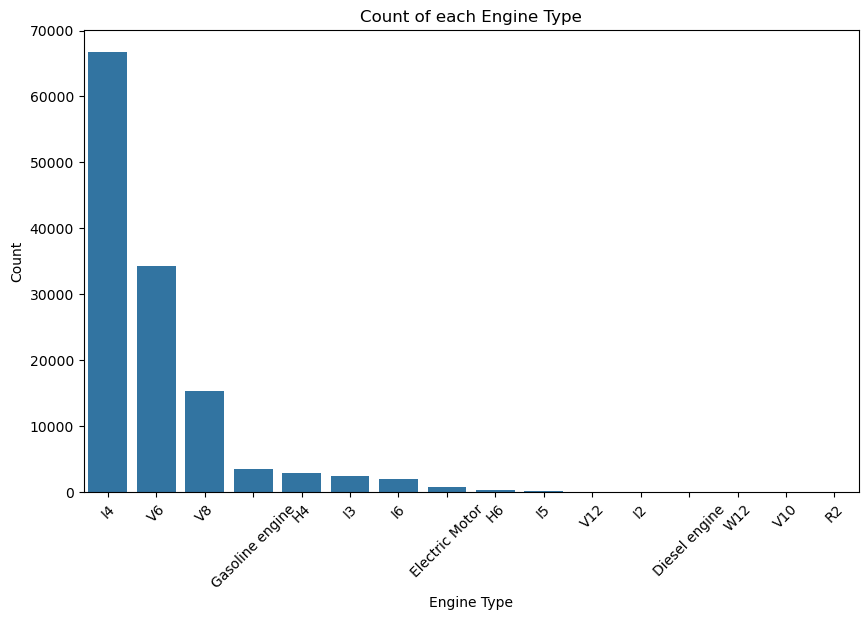

In [174]:
# Count occurrences of each engine type
engine_type_counts = df['engine_type'].value_counts().reset_index()
engine_type_counts.columns = ['engine_type', 'count']

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='engine_type', y='count', data=engine_type_counts)
plt.title('Count of each Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

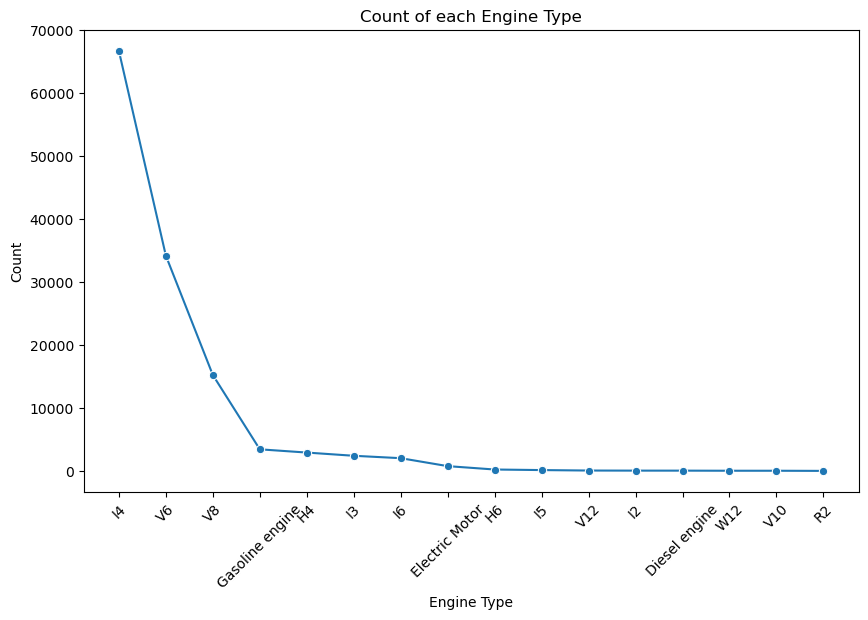

In [175]:
# Count occurrences of each engine type
engine_type_counts = df['engine_type'].value_counts().reset_index()
engine_type_counts.columns = ['engine_type', 'count']

# Plotting the graph as a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='engine_type', y='count', data=engine_type_counts, marker='o')
plt.title('Count of each Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

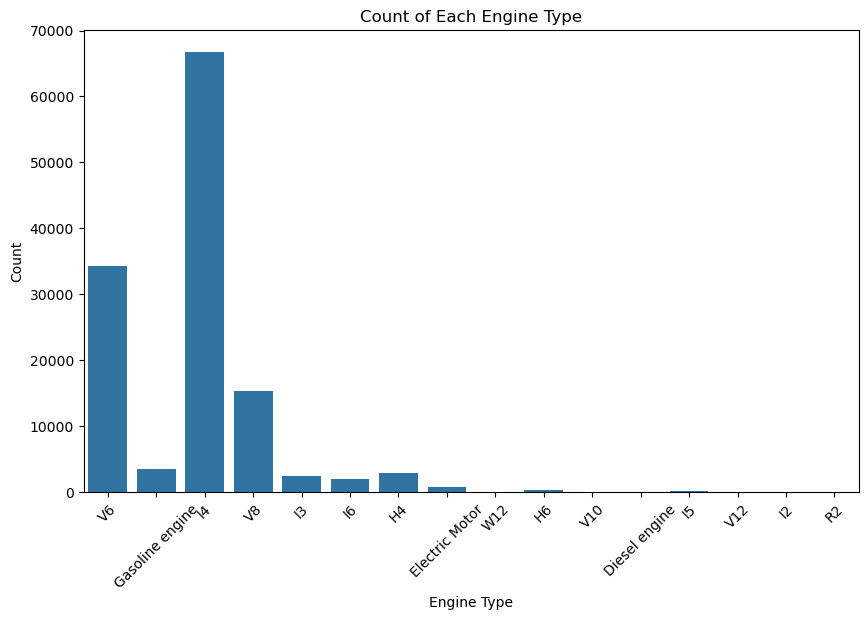

In [176]:
# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='engine_type')
plt.title('Count of Each Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [177]:
'''FUEL TYPE'''

'FUEL TYPE'

In [178]:

# Grouping by 'fuel_type' and counting the occurrences of each value
fuel_type_counts = df.groupby('fuel_type').size().reset_index(name='count')

# Displaying the count of each value in the 'fuel_type' column
print(fuel_type_counts)

                fuel_type   count
0               Biodiesel    1067
1  Compressed Natural Gas       9
2                  Diesel    1740
3                Electric     758
4       Flex Fuel Vehicle    6018
5                Gasoline  115394
6                  Hybrid    3299


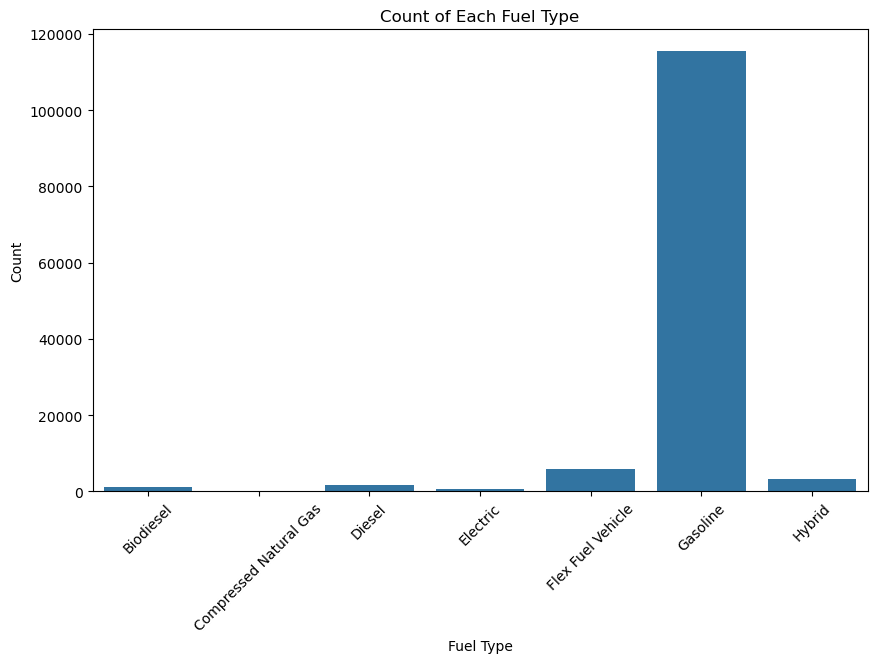

In [179]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_type', y='count', data=fuel_type_counts)
plt.title('Count of Each Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [180]:
#TASK 2.2 - Most Common Fuel Type is Gasoline

In [181]:
'''SCATTER PLOT OF MILEAGE VS FUEL TYPE'''

'SCATTER PLOT OF MILEAGE VS FUEL TYPE'

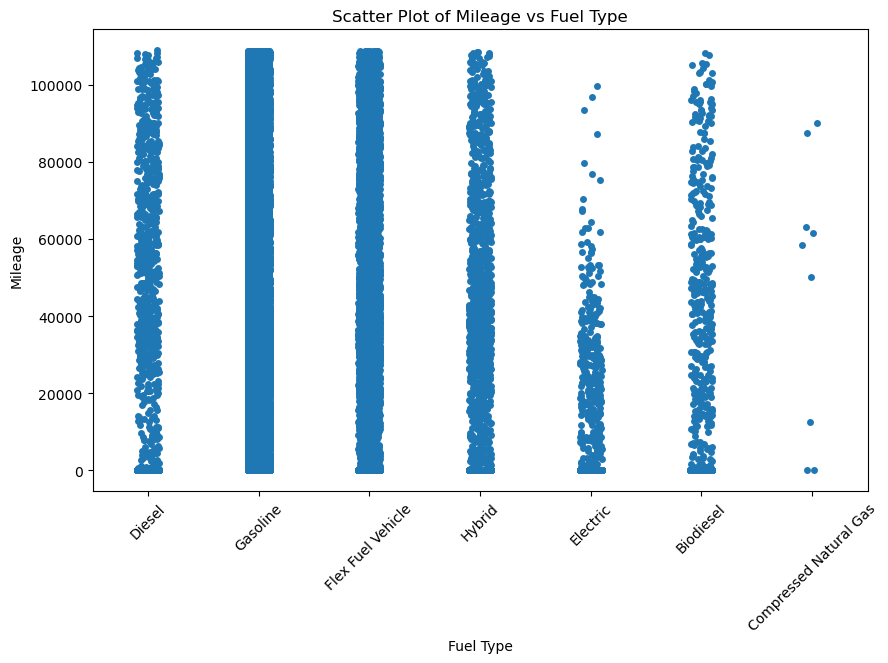

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correctly selecting the 'fuel_type' and 'mileage' columns from the DataFrame
fuel_type_mileage_pd = df[['fuel_type', 'mileage']]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='fuel_type', y='mileage', data=fuel_type_mileage_pd, jitter=True)
plt.title('Scatter Plot of Mileage vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.xticks(rotation=45)
plt.show()


In [183]:
# Grouping by 'wheel_system' and counting the occurrences of each value
wheel_system_counts = df.groupby('wheel_system').size().reset_index(name='count')

# Displaying the count of each value in the 'wheel_system' column
print(wheel_system_counts)

  wheel_system  count
0          4WD  24355
1          4X2   4975
2          AWD  30470
3          FWD  60652
4          RWD   7833


In [184]:
# Task 2.3 - Calculating Average Horsepower

In [185]:
# Calculate the average of the 'horsepower' column
average_horsepower = df['horsepower'].mean()

print("Average Horsepower:", average_horsepower)

Average Horsepower: 243.20449779787194


In [186]:
# Calculate descriptive statistics
mean_horsepower = df['horsepower'].mean()
min_horsepower = df['horsepower'].min()
stddev_horsepower = df['horsepower'].std()
max_horsepower = df['horsepower'].max()

# Display the results
print(f"Mean: {mean_horsepower}")
print(f"Min: {min_horsepower}")
print(f"Standard Deviation: {stddev_horsepower}")
print(f"Max: {max_horsepower}")

Mean: 243.20449779787194
Min: 63.0
Standard Deviation: 90.36370930579044
Max: 797.0


In [187]:
'''CORRELATIONAL VALUES FOR EACH COLUMN'''

'CORRELATIONAL VALUES FOR EACH COLUMN'

In [188]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Extract correlations with 'horsepower' and rename the columns
correlations_with_horsepower = correlation_matrix['horsepower'].drop('horsepower')
correlations_with_horsepower = correlations_with_horsepower.reset_index()
correlations_with_horsepower.columns = ['Column', 'Correlation_with_horsepower']

# Display the correlation coefficients
print(correlations_with_horsepower)

                   Column  Correlation_with_horsepower
0            daysonmarket                    -0.017908
1         maximum_seating                     0.313894
2                 mileage                    -0.012438
3                   price                     0.612528
4          savings_amount                     0.151603
5                  torque                     0.779137
6                    year                     0.016946
7   combined_fuel_economy                    -0.501544
8                 legroom                     0.379393
9     major_options_count                     0.330680
10        size_of_vehicle                     0.749576


In [ ]:
# TASK 2.2 : Find the most common fuel type

In [219]:
most_common_fuel_type = df['fuel_type'].mode()[0]
most_common_fuel_type

'Gasoline'

In [189]:
# TASK 2.3 : AVERAGE HORSEPOWER WITH THE MOST COMMONLY USED FUEL 

In [190]:
# Find the most common fuel type
most_common_fuel_type = df['fuel_type'].mode()[0]

# Filter the DataFrame to include only vehicles with the most common fuel type
filtered_df = df[df['fuel_type'] == most_common_fuel_type]

# Calculate the average horsepower for the filtered DataFrame
average_horsepower = filtered_df['horsepower'].mean()

print(f"Average horsepower of vehicles with the most common fuel type ({most_common_fuel_type}): {average_horsepower:.2f}")

Average horsepower of vehicles with the most common fuel type (Gasoline): 240.34


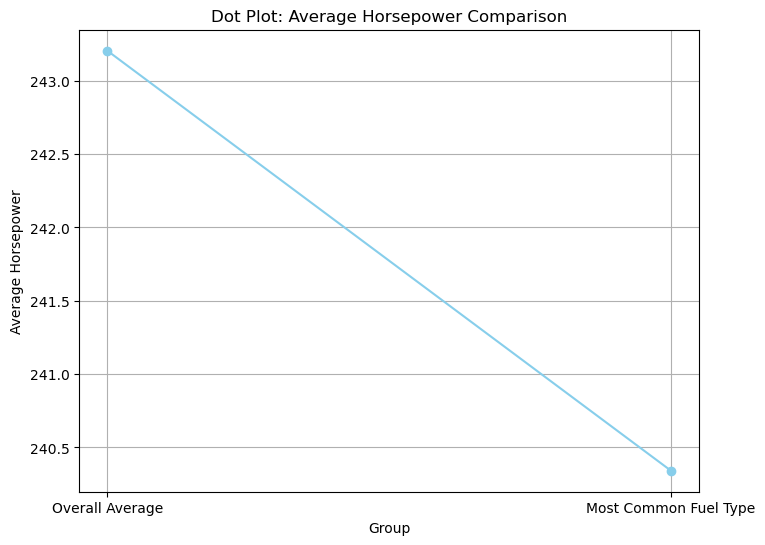

In [191]:
# Find the most common fuel type
most_common_fuel_type = df['fuel_type'].mode()[0]

# Filter the DataFrame to include only vehicles with the most common fuel type
filtered_df = df[df['fuel_type'] == most_common_fuel_type]

# Calculate average horsepower
overall_avg_horsepower = df['horsepower'].mean()
average_horsepower = filtered_df['horsepower'].mean()

# Plotting the dot plot
plt.figure(figsize=(8, 6))
plt.plot(['Overall Average', 'Most Common Fuel Type'], [overall_avg_horsepower, average_horsepower], marker='o', linestyle='-', color='skyblue')
plt.title('Dot Plot: Average Horsepower Comparison')
plt.xlabel('Group')
plt.ylabel('Average Horsepower')
plt.grid(True)
plt.show()

In [192]:
print(df.columns)

Index(['vin', 'body_type', 'daysonmarket', 'engine_type', 'exterior_color',
       'fuel_type', 'horsepower', 'interior_color', 'make_name',
       'maximum_seating', 'mileage', 'model_name', 'price', 'savings_amount',
       'seller_rating', 'torque', 'transmission', 'wheel_system', 'year',
       'combined_fuel_economy', 'legroom', 'major_options_count',
       'dealer_region', 'size_of_vehicle'],
      dtype='object')


In [193]:
# Group by 'exterior_color' and count occurrences
exterior_color_counts = df.groupby('exterior_color').size().reset_index(name='count')

# Display the counts
print(exterior_color_counts)

  exterior_color  count
0          Black  25376
1           Blue  10061
2           Gray   9031
3   Mixed Colors   2815
4    Other Color  29537
5            Red   9516
6         Silver  14687
7          White  27262


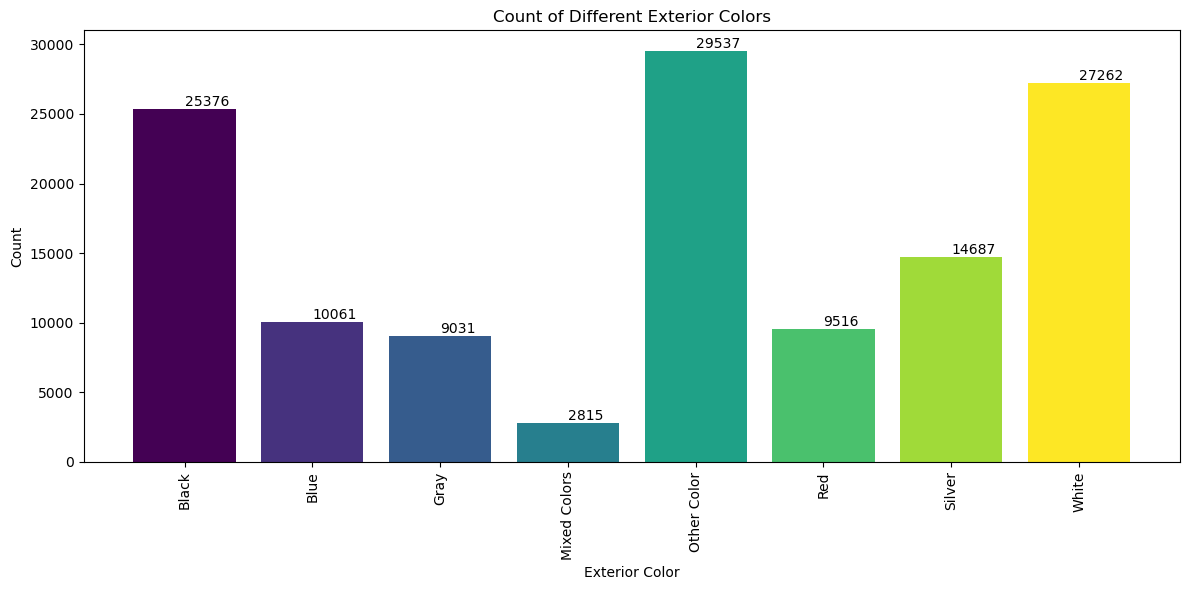

In [194]:
# Generate a colormap with the number of colors equal to the number of bars
colors = plt.cm.viridis(np.linspace(0, 1, len(exterior_color_counts)))

# Plotting the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(exterior_color_counts['exterior_color'], 
               exterior_color_counts['count'], 
               color=colors)

plt.title('Count of Different Exterior Colors')
plt.xlabel('Exterior Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

# Optionally, add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.show()

In [195]:
# HEATMAP FOR EXTERIOR COLOUR 

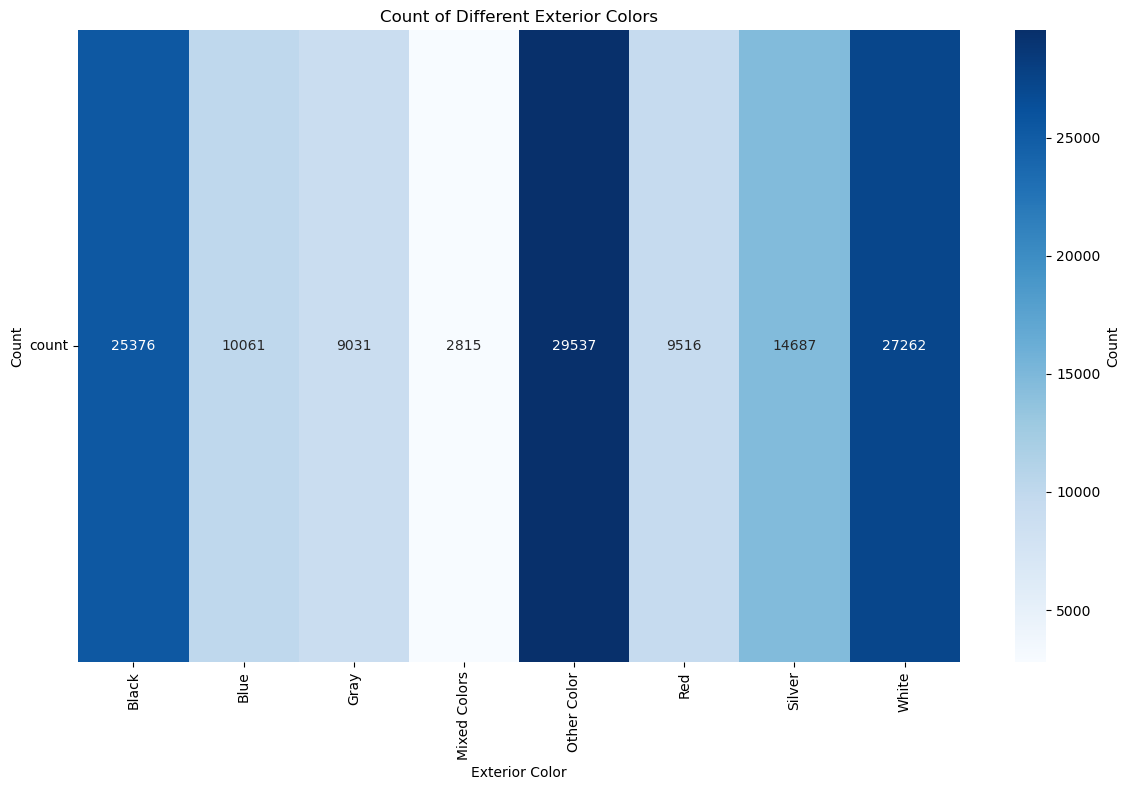

In [196]:
# Reshape DataFrame for heatmap (pivot to create a matrix-like structure)
heatmap_data = exterior_color_counts.set_index('exterior_color').T

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Count of Different Exterior Colors')
plt.xlabel('Exterior Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [197]:
# Task 2.4 - Analysis of city_fuel_economy in various cities(we have pre processed it to combined_fuel_economy in Preprocessing notebook)

In [198]:
# Count non-null values in 'combined_fuel_economy' column
combined_fuel_economy_count = df['combined_fuel_economy'].notna().sum()

print("Count of values in the 'combined_fuel_economy' column:", combined_fuel_economy_count)

Count of values in the 'combined_fuel_economy' column: 128285


In [199]:
# Calculate the mean of the 'combined_fuel_economy' column
mean_combined_fuel_economy = df['combined_fuel_economy'].mean()

print("Mean of the 'combined_fuel_economy' column:", mean_combined_fuel_economy)

Mean of the 'combined_fuel_economy' column: 26.351680212755966


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_60094/610152511.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['combined_fuel_economy'].dropna(), shade=True)


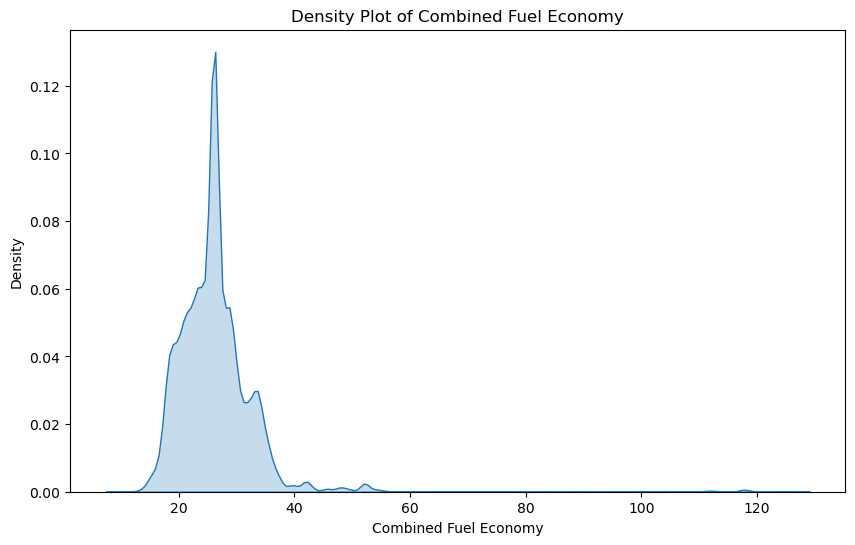

In [200]:
# Plotting the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['combined_fuel_economy'].dropna(), shade=True)
plt.title('Density Plot of Combined Fuel Economy')
plt.xlabel('Combined Fuel Economy')
plt.ylabel('Density')
plt.show()

In [204]:
#Task 3.1 - Examine the price trend over the years for the top 5 most popular body_types and visualize it

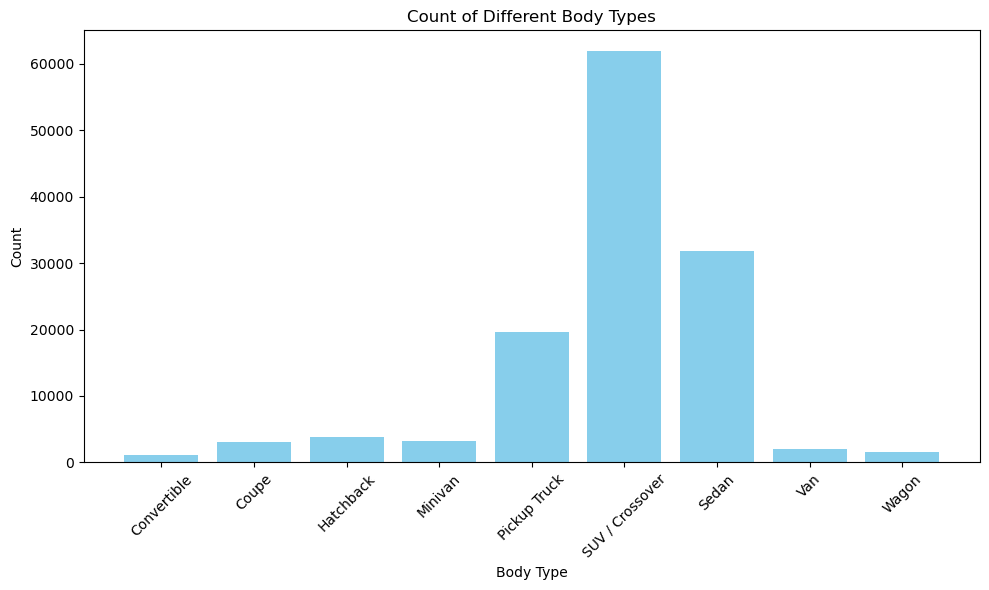

In [205]:
# Group by 'body_type' and count occurrences
body_type_counts_pd = df.groupby('body_type').size().reset_index(name='count')

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(body_type_counts_pd['body_type'], body_type_counts_pd['count'], color='skyblue')
plt.title('Count of Different Body Types')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Convert 'body_type' to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['body_type'], drop_first=True)

# Define feature columns and target variable
feature_cols = ['mileage', 'year'] + [col for col in df_encoded.columns if col.startswith('body_type_')]
X = df_encoded[feature_cols]
y = df_encoded['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Create a DataFrame for actual vs predicted values
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Coefficients and intercept
coefficients = lr.coef_
intercept = lr.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Root Mean Squared Error (RMSE): 0.35737936540278936
Coefficients: [-8.00143325e-06  2.09528172e-02 -1.34840397e-01 -8.38123166e-01
 -4.15910719e-01 -3.37415187e-02 -3.67970805e-01 -6.26370536e-01
 -3.84864812e-01 -5.71274549e-01]
Intercept: -31.512820121242566


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


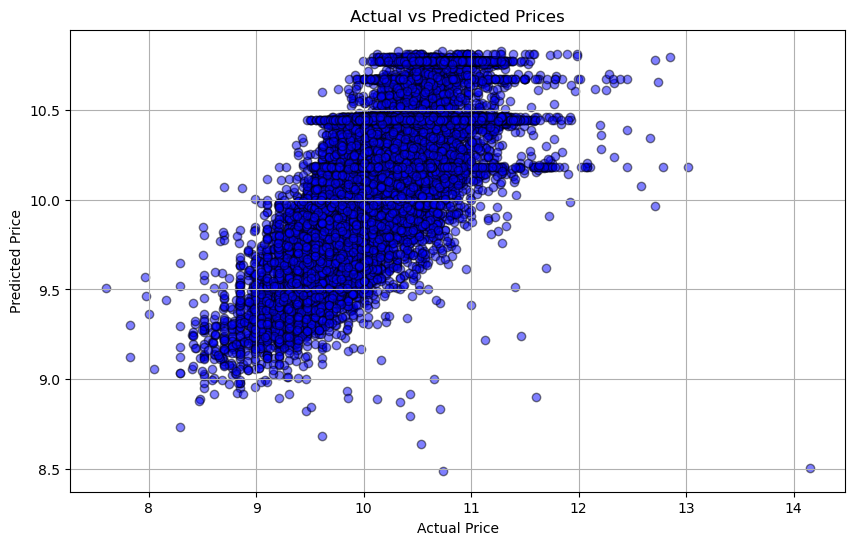

In [207]:
# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual Price'], results_df['Predicted Price'], alpha=0.5, color='blue', edgecolors='k')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

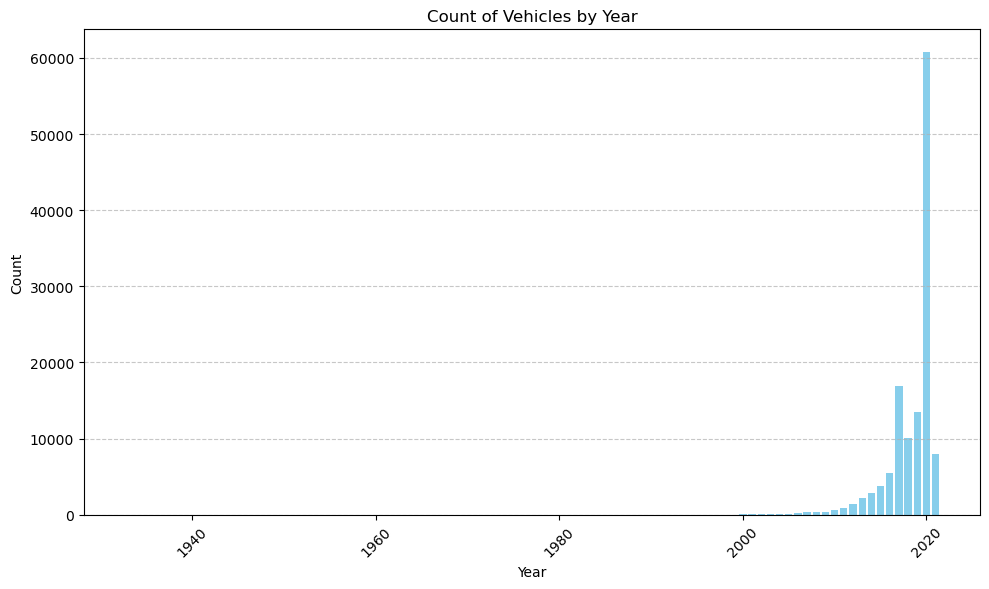

In [222]:
# Plotting the counts
plt.figure(figsize=(10, 6))
plt.bar(year_counts['year'], year_counts['count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Vehicles by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

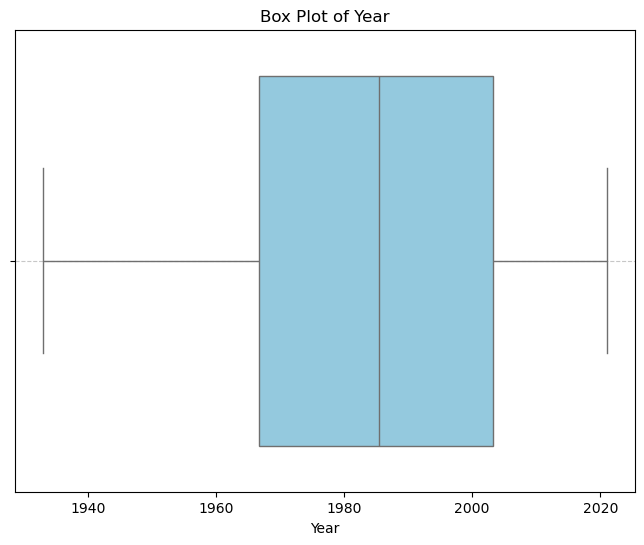

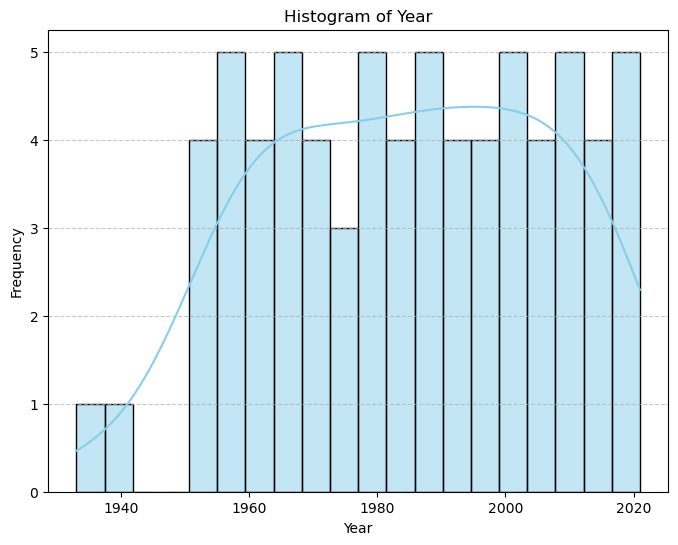

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_60094/422493272.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(year_counts['year'], shade=True, color='skyblue')


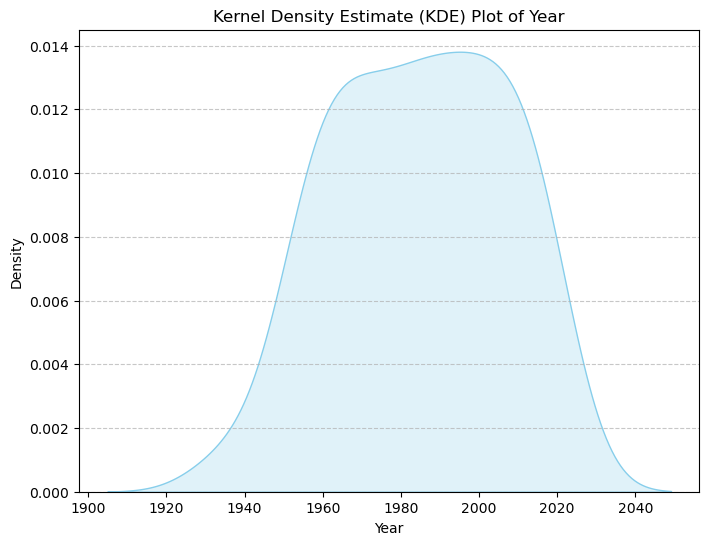

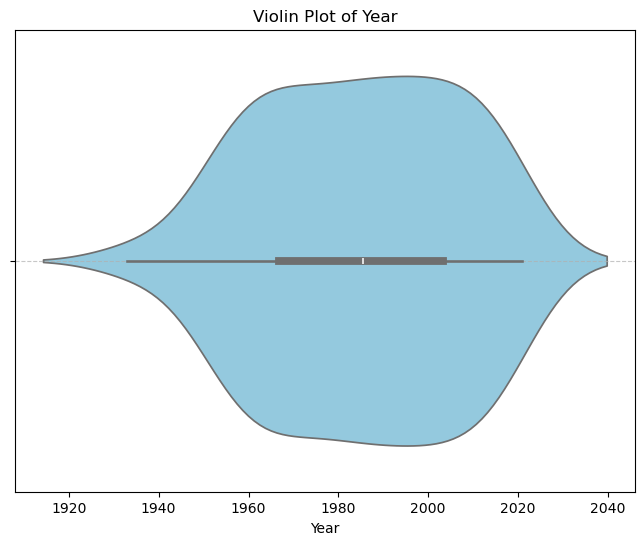

Summary Statistics of Year:
              year         count
count    72.000000     72.000000
mean   1984.791667   1781.736111
std      22.042173   7646.538276
min    1933.000000      1.000000
25%    1966.750000      3.750000
50%    1985.500000      7.000000
75%    2003.250000     89.250000
max    2021.000000  60719.000000


In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics
year_stats = year_counts.describe()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=year_counts['year'], color='skyblue')
plt.title('Box Plot of Year')
plt.xlabel('Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(year_counts['year'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Kernel Density Estimate (KDE) plot
plt.figure(figsize=(8, 6))
sns.kdeplot(year_counts['year'], shade=True, color='skyblue')
plt.title('Kernel Density Estimate (KDE) Plot of Year')
plt.xlabel('Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=year_counts['year'], color='skyblue')
plt.title('Violin Plot of Year')
plt.xlabel('Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Summary statistics
print("Summary Statistics of Year:")
print(year_stats)


In [208]:
# List the column names of the DataFrame
column_names = df.columns
print(column_names)
print('\n')
# List the column names along with their types
column_types = df.dtypes
print(column_types)




Index(['vin', 'body_type', 'daysonmarket', 'engine_type', 'exterior_color',
       'fuel_type', 'horsepower', 'interior_color', 'make_name',
       'maximum_seating', 'mileage', 'model_name', 'price', 'savings_amount',
       'seller_rating', 'torque', 'transmission', 'wheel_system', 'year',
       'combined_fuel_economy', 'legroom', 'major_options_count',
       'dealer_region', 'size_of_vehicle'],
      dtype='object')


vin                       object
body_type                 object
daysonmarket               int64
engine_type               object
exterior_color            object
fuel_type                 object
horsepower               float64
interior_color            object
make_name                 object
maximum_seating            int64
mileage                  float64
model_name                object
price                    float64
savings_amount             int64
seller_rating             object
torque                   float64
transmission              object
wheel_system

In [209]:
# Task 3.2 - LEGROOM AND PRICE using Regression

In [210]:
df['legroom'].head(10)


0    76.866806
1    80.164010
2    79.300000
3    80.500000
4    77.100000
5    81.100006
6    86.100006
7    82.700000
8    84.000000
9    78.100000
Name: legroom, dtype: float64

In [221]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df[['legroom']]
y = df['price']

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)
print("RMSE:", rmse)
print("R-squared:", r2)


Coefficients: [0.04875044]
Intercept: 6.310617794267364
RMSE: 0.4815218354279154
R-squared: 0.10113419643302124


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


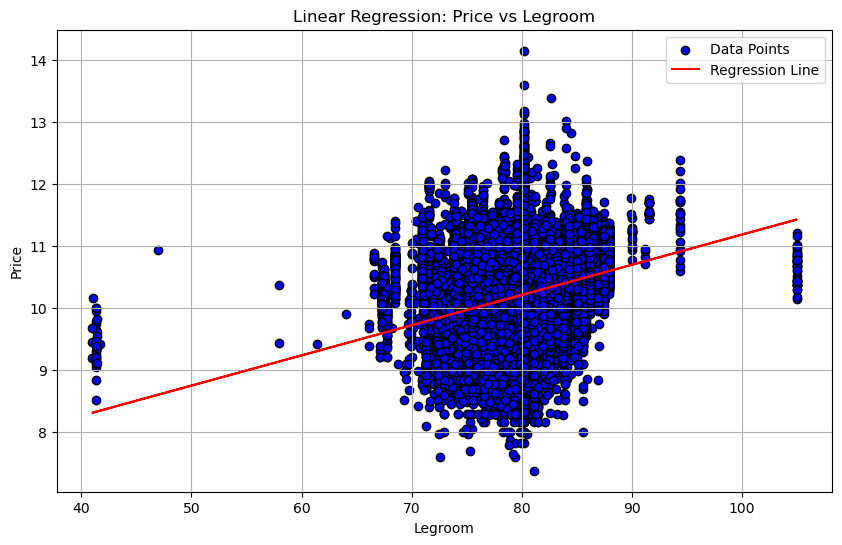

In [212]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
X = df[['legroom']]
y = df['price']

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data Points', color='blue', edgecolors='k')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Legroom')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Legroom')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [213]:
# => highly positive correlation between legroom and price

In [214]:
year_counts = df.groupby('year').size().reset_index(name='count')

# Display the counts
print(year_counts)

    year  count
0   1933      1
1   1940      1
2   1951      1
3   1952      2
4   1953      1
..   ...    ...
67  2017  16939
68  2018  10016
69  2019  13505
70  2020  60719
71  2021   7924

[72 rows x 2 columns]
